In [7]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import yfinance as yf

# data = yf.download("USDEUR=X", start='2018-01-01', end='2022-12-31', interval='1d')
data = yf.download("EURUSD=X",start='2010-01-01', end='2022-12-31')
n = 31
rolling_min = data['Close'].rolling(n).min().rolling(500).min()
zones = data[data['Close']==rolling_min]["Close"].sort_values(ascending=True)

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])


date = data.index.tolist()            
for i in range(len(zones)):
    m = zones[i]
    a = data[data["Close"]==m].index[0]
    if date.index(a)+150<len(date):
        a1=date[date.index(a)+150]
    else:
        a1=date[:-1]
    fig.add_shape(
    # horizontal line
    dict(
            type="line",
            x0=a,
            y0=m,
            x1=a1,            
            y1=m,
            line=dict(
                color="black",
                width=2,
                dash="dot"
            )
        )
    )
fig.show()

[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [4]:
zones.sort_values(ascending=True)[:5]

Date
2022-09-28    0.959619
2022-09-27    0.962371
2022-09-26    0.968992
2022-09-22    0.983072
2022-09-07    0.989795
Name: Close, dtype: float64

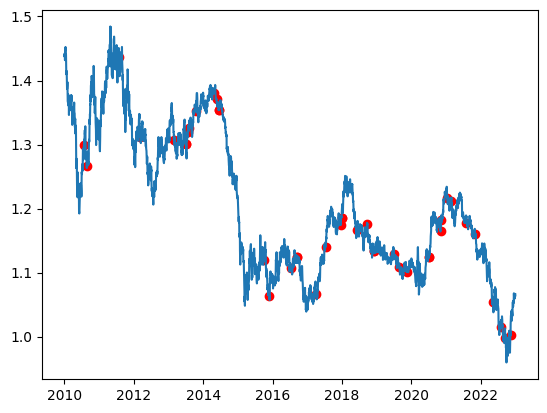

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def trend_line_min(data, window=2):
    rolling_min = data.rolling(window).min()
    rolling_min_mean = rolling_min.rolling(window).mean()
    local_min = rolling_min[(rolling_min_mean.diff() < 0.0001) & (0<rolling_min_mean.diff()) ]
    return data, local_min

# Example usage
trend, local_min = trend_line_min(data)

plt.plot(trend["Close"])
plt.scatter(local_min.index,local_min["Close"], color="red")

In [8]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
# data = yf.download("USDEUR=X", start='2018-01-01', end='2022-12-31', interval='1d')
data = yf.download("USDEUR=X",start='2018-01-01', end='2022-12-31')

def trend_line_min(data, window=30):
    rolling_min = data.rolling(window).min()
    rolling_min_mean = rolling_min.rolling(window).mean()
    local_min = rolling_min[(rolling_min_mean.diff() < 0.001) & (-0.001<rolling_min_mean.diff()) ]
    return data, local_min
trend, local_min = trend_line_min(data)

# Example usage
local_min = local_min["Close"].dropna()
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

date = data.index.tolist()            
for i in range(len(local_min)):
    m = local_min[i]
    a = data[data["Close"]==m].index[0]
    if date.index(a)+200<len(date):
        a1=date[date.index(a)+200]
    else:
        a1=date[:-1]
    fig.add_shape(
    # horizontal line
    dict(
            type="line",
            x0=a,
            y0=m,
            x1=a1,            
            y1=m,
            line=dict(
                color="black",
                width=2,
                dash="dot"
            )
        )
    )
fig.show()

[*********************100%***********************]  1 of 1 completed
